In [60]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
from pandas.api.types import CategoricalDtype

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

## Setup and configuration

In [61]:
# Font veranderen. 
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [76]:
base_path = '../processed_data/performance_testing/'
pages = ['login', 'register', 'transactions', 'transactions-edit-2', 'places']
statistics = ['score', 'first-contentful-paint', 'largest-contentful-paint', 'total-blocking-time', 'cumulative-layout-shift', 'speed-index']

pages_descriptions = {
    'login': 'Inlogpagina (niet ingelogd)',
    'register': 'Registreerpagina (niet ingelogd)',
    'transactions': 'Transacties pagina',
    'transactions-edit-2': 'Transactie bijwerkingspagina',
    'places': 'Plaats beoordelingspagina'
}

statistic_descriptions = {
    'score': 'Score',
    'first-contentful-paint': 'Eerste inhoudsvolle verf (FCP)',
    'largest-contentful-paint': 'Grootste inhoudsvolle verf (LCP)',
    'total-blocking-time': 'Totale blokkeertijd (TBT)',
    'cumulative-layout-shift': 'Cumulatieve lay-outverschuiving (CLS)',
    'speed-index': 'Snelheidsindex (SI)',
}

## Mean and standard deviation

Calculate mean and standard deviation.

In [ ]:
for page in pages: 
    before = pd.read_csv(filepath_or_buffer=f'{base_path}/original/{page}.csv', delimiter=',', header=0, index_col=0)
    after = pd.read_csv(filepath_or_buffer=f'{base_path}/cybersecurity/{page}.csv', delimiter=',', header=0, index_col=0)

    print(page)

    for statistic in before.columns: 
        before_mean = before[statistic].mean()
        before_std = before[statistic].std()

        after_mean = after[statistic].mean()
        after_std = after[statistic].std()

        print(f'    {statistic}:')
        print(f'    before: mean={before_mean:.2f} std={before_std:.2f}')
        print(f'    after: mean={after_mean:.2f} std={after_std:.2f}')
        print()


## Visualize data

Visualize results with violinplot.

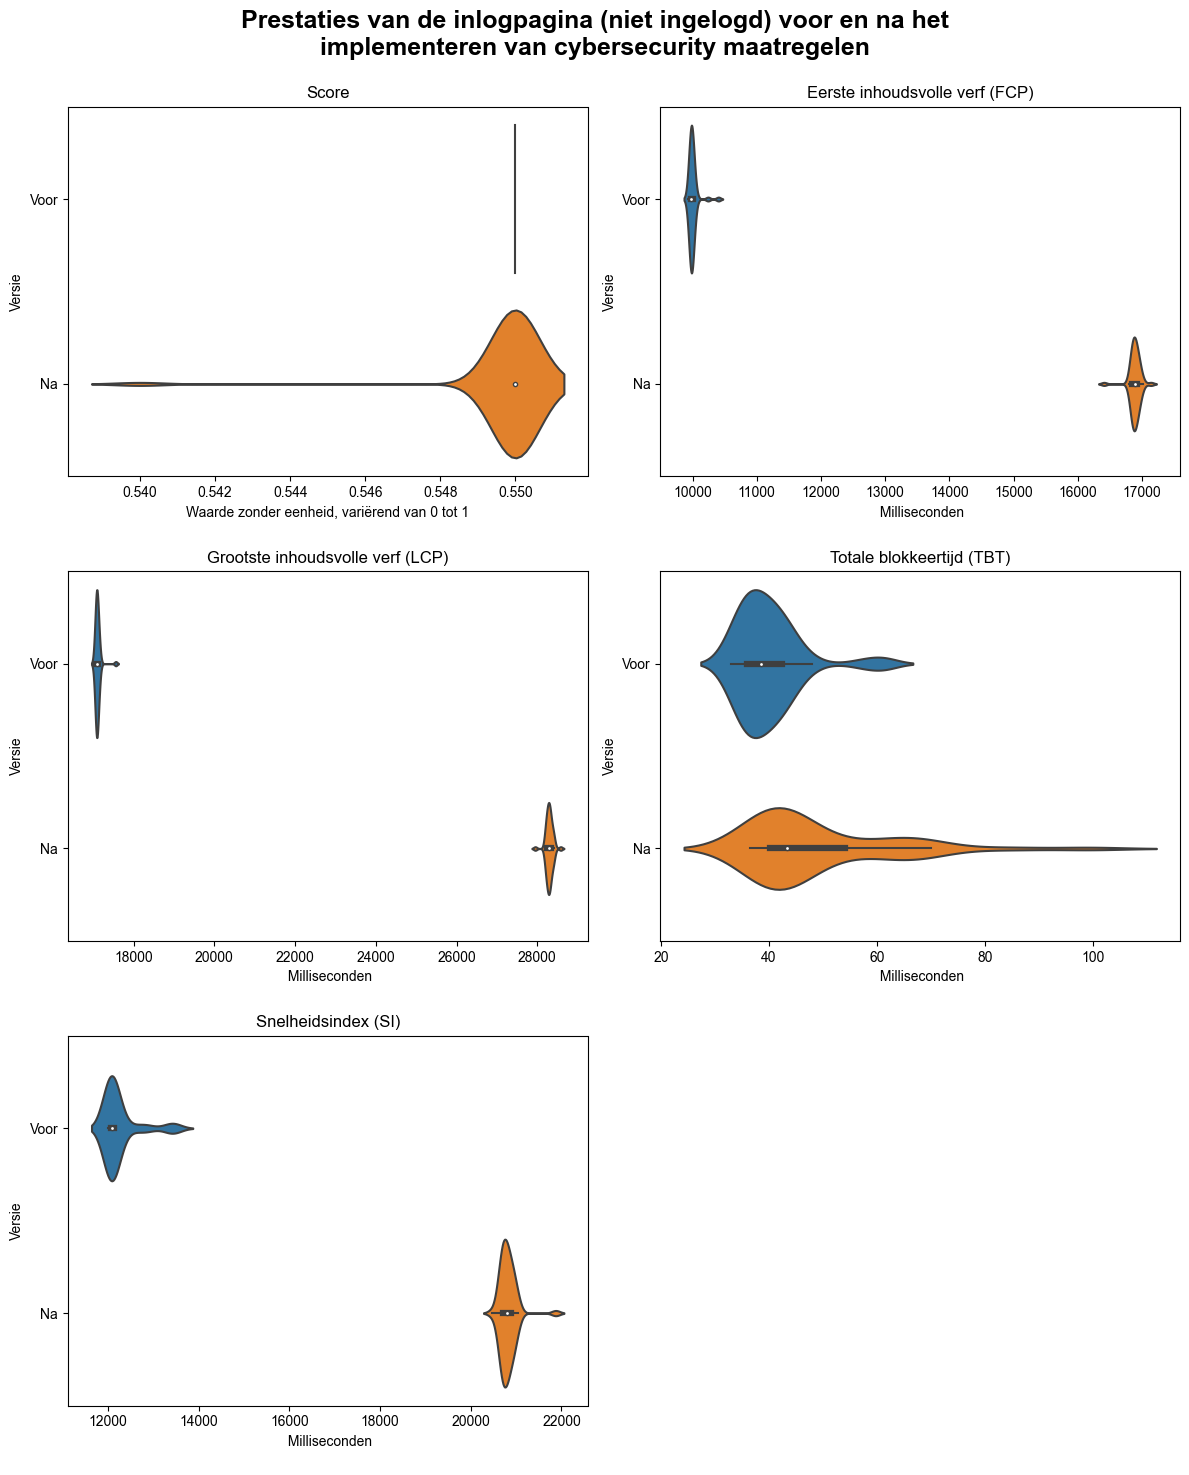

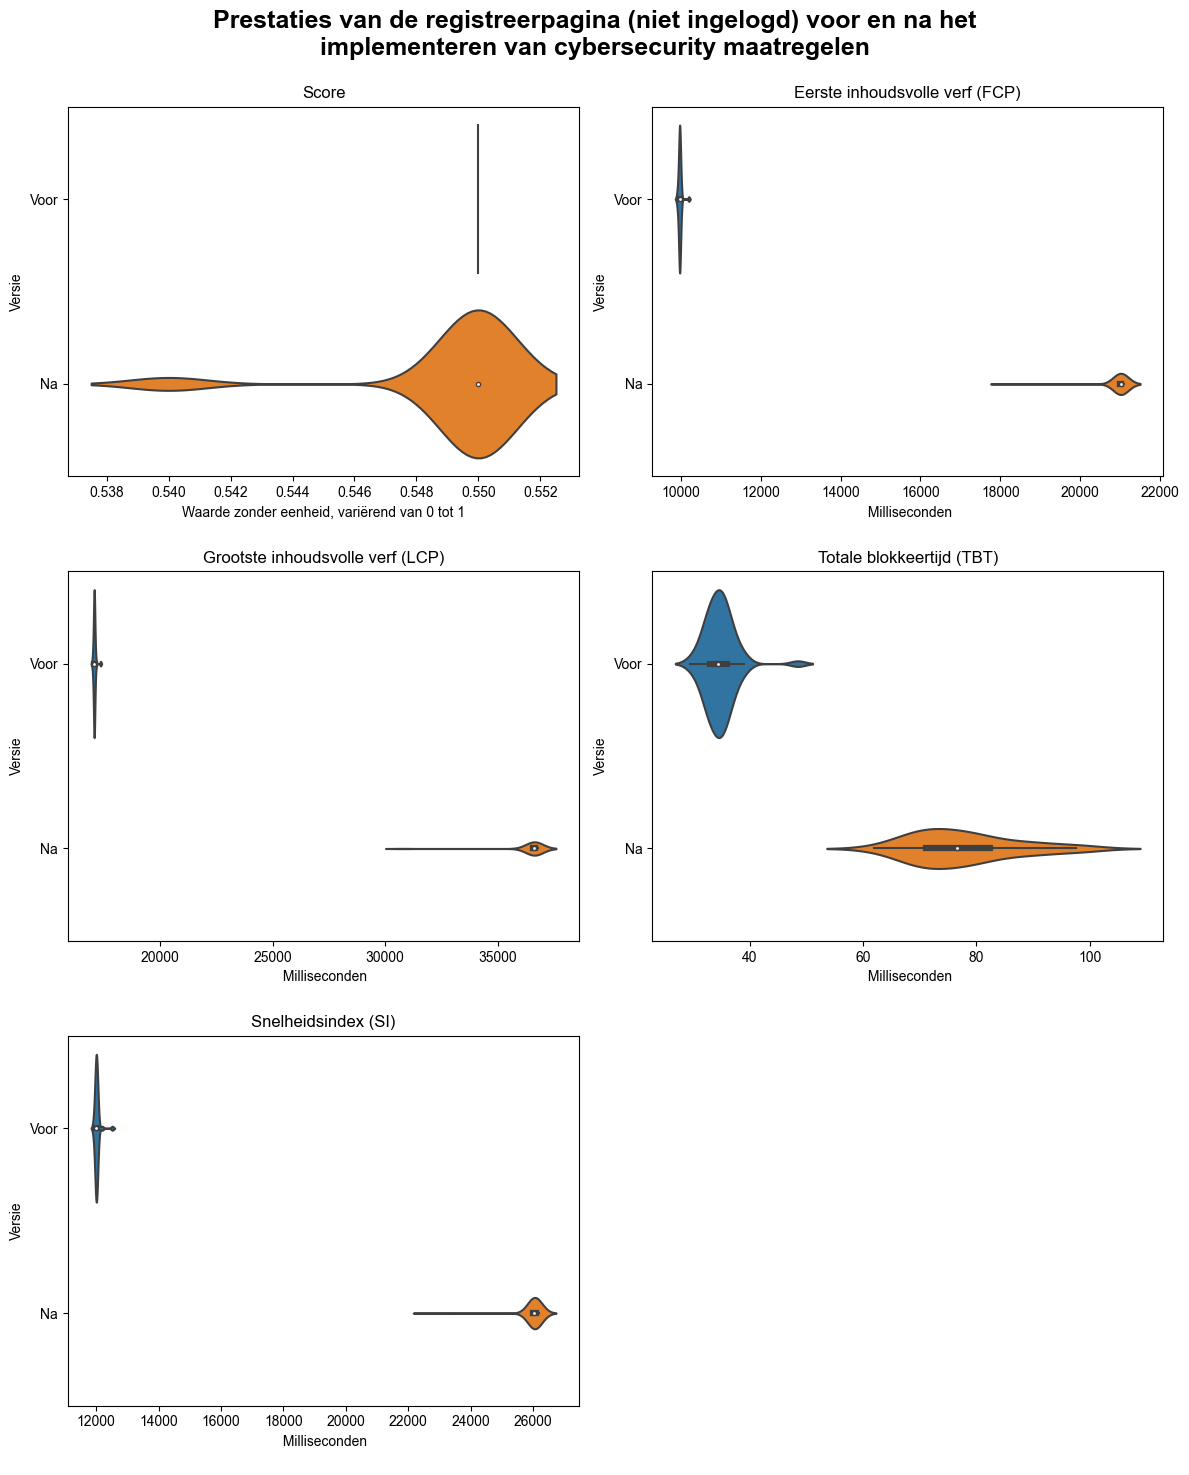

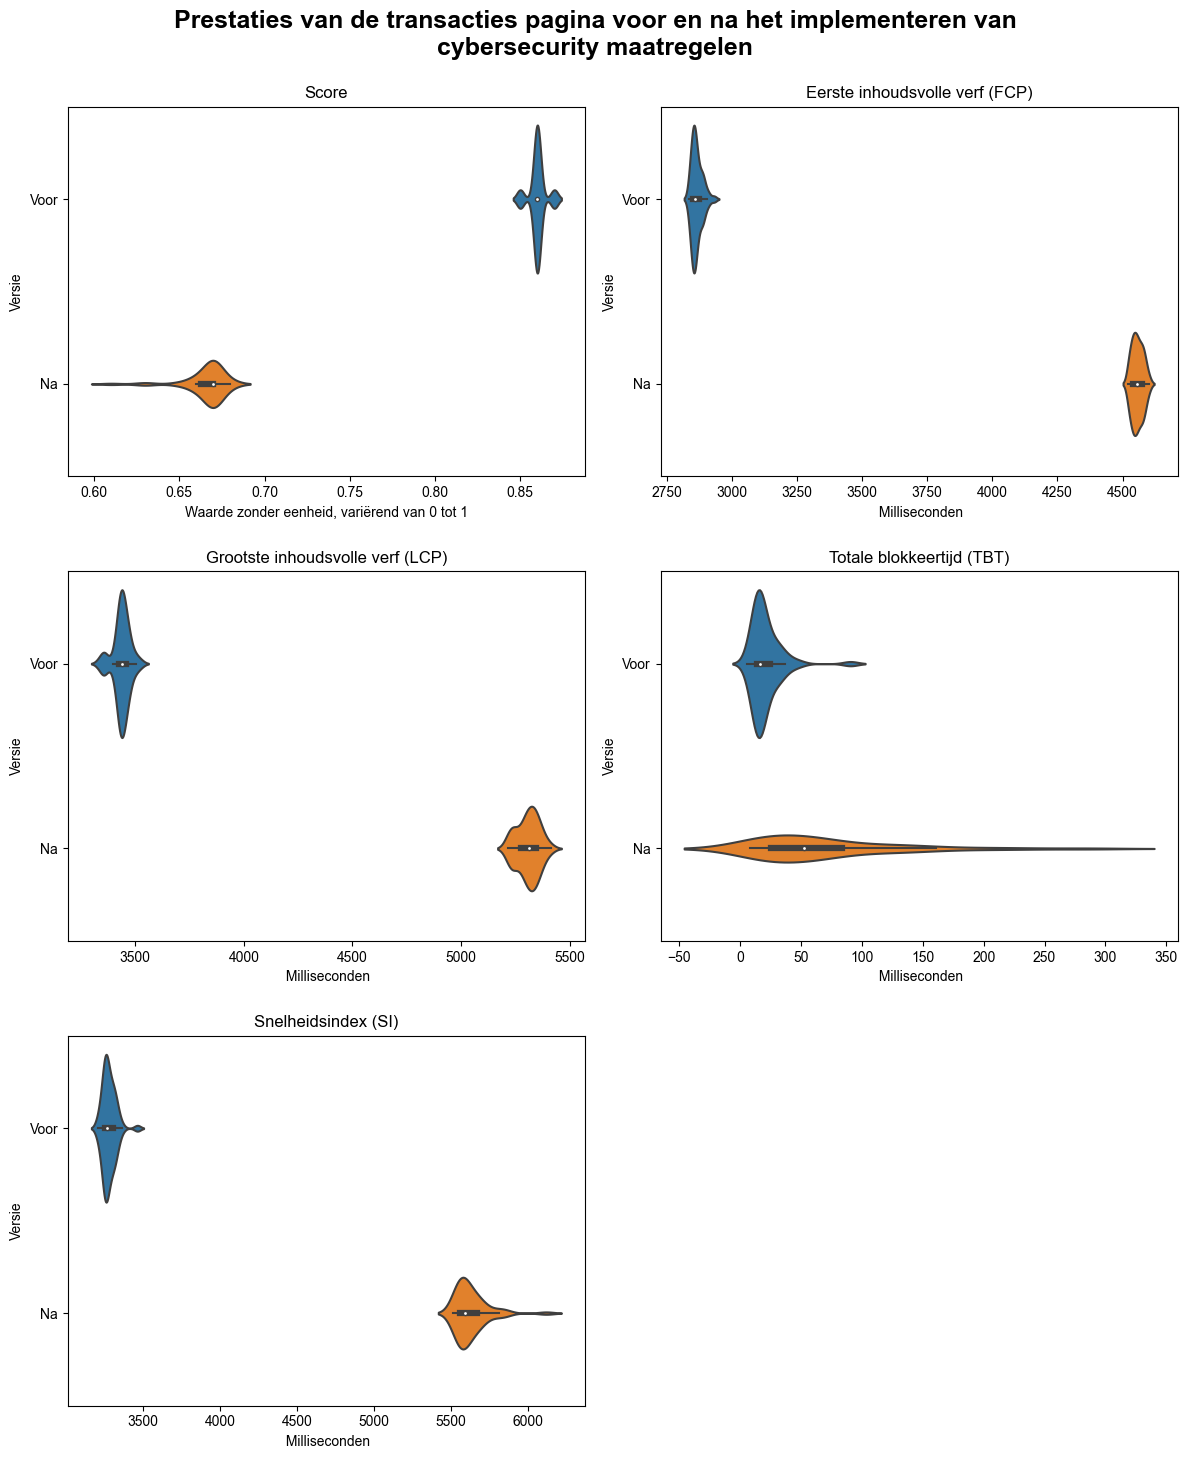

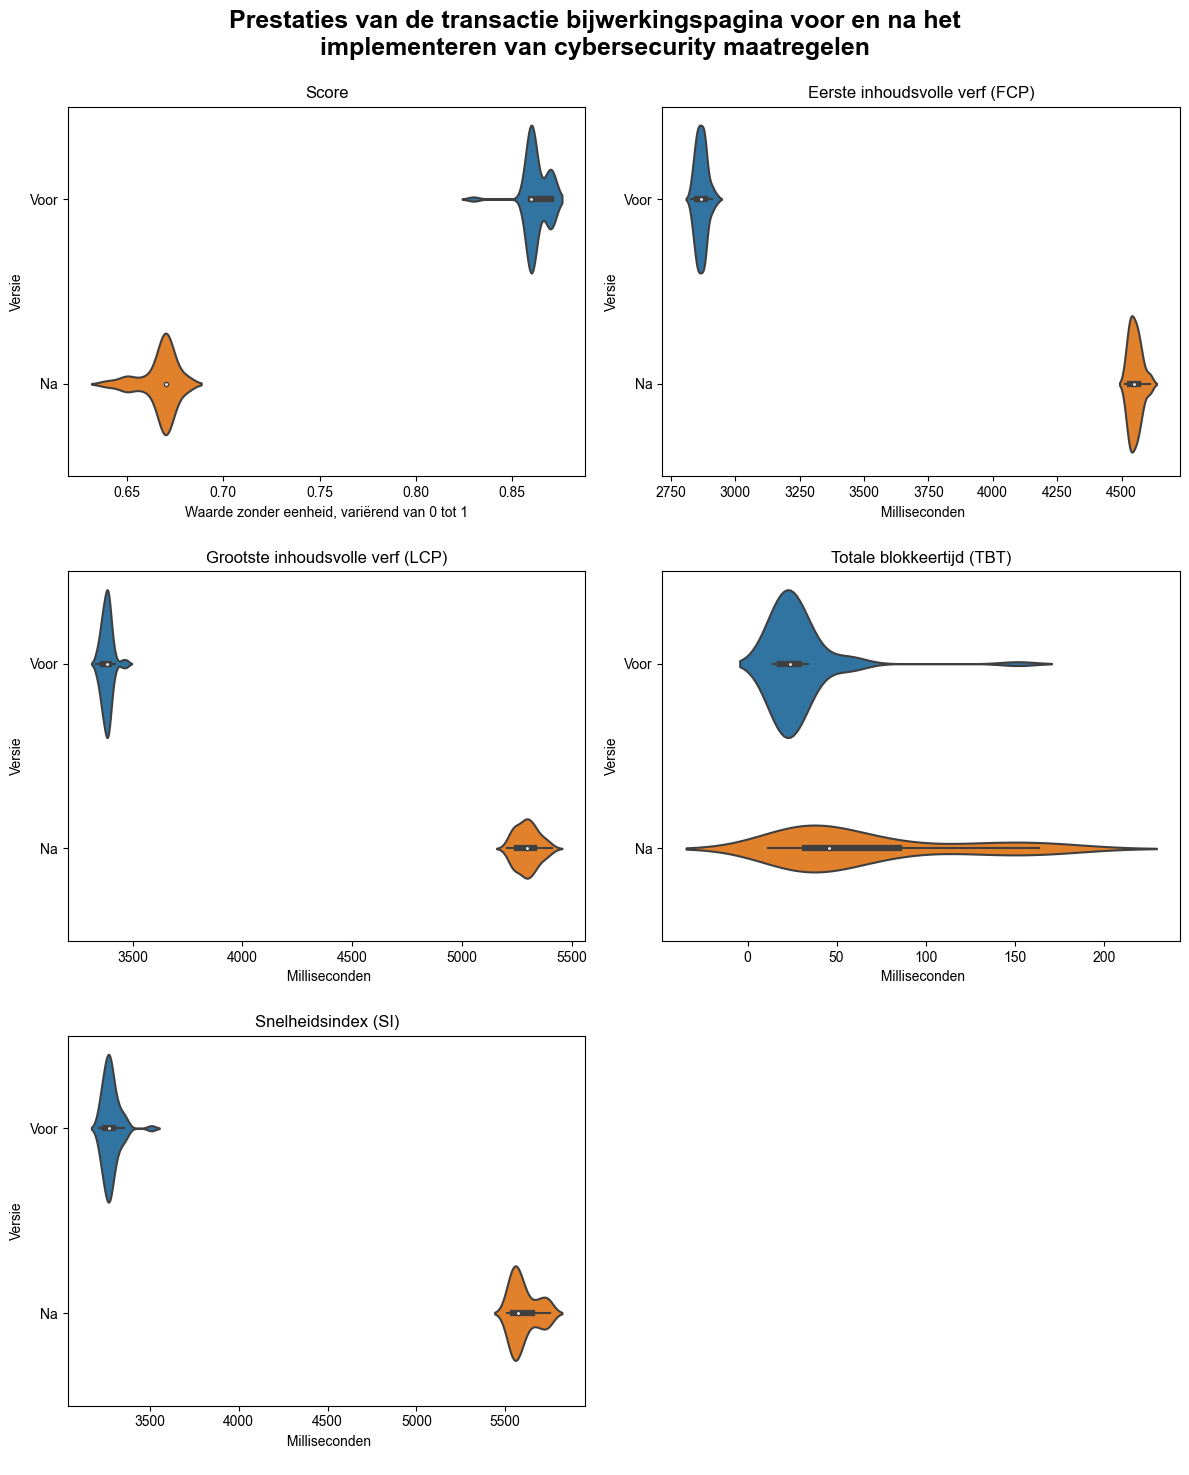

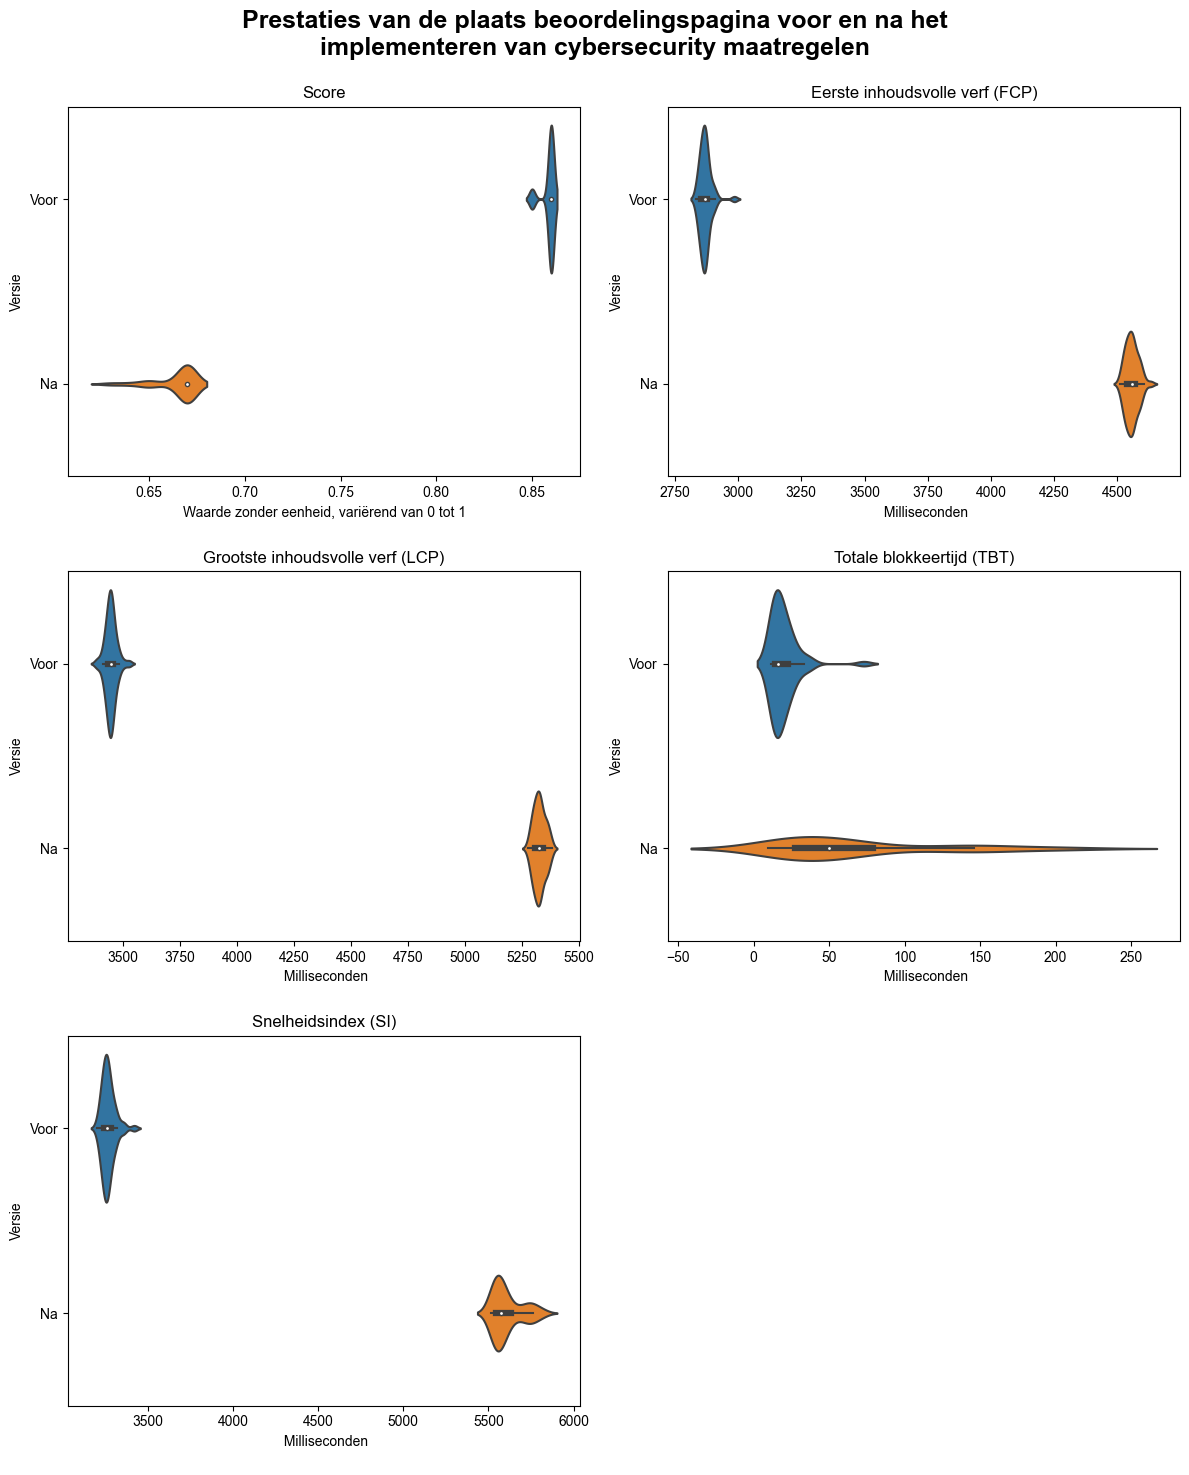

In [79]:
import textwrap

# Generate tabel for each page manually. 
for page in pages:
    # Grouped boxplot.
    figure, axes = plt.subplots(3, 2, figsize=(12, 15))
    axes = axes.ravel()

    title = f'Prestaties van de {pages_descriptions[page].lower()} voor en na het implementeren van cybersecurity maatregelen'
    wrapped_title = textwrap.fill(title, width=70)

    figure.suptitle(f'{wrapped_title}\n', fontweight='bold', fontsize=18)

    filtered_statistics = [stat for stat in statistics if stat not in ['cumulative-layout-shift']]

    for index, statistic in enumerate(filtered_statistics):
        ax = axes[index]

        before = pd.read_csv(filepath_or_buffer=f'{base_path}/original/{page}.csv', delimiter=',', header=0, index_col=0)
        after = pd.read_csv(filepath_or_buffer=f'{base_path}/cybersecurity/{page}.csv', delimiter=',', header=0, index_col=0)
        
        before['source'] = 'Voor'
        after['source'] = 'Na'

        data = pd.concat([before, after])

        #sns.boxplot(data=data, x=statistic, y='source', ax=ax)
        #sns.kdeplot(data=data, x=statistic, hue='source', ax=ax)
        sns.violinplot(data=data, x=statistic, y='source', ax=ax)

        ax.set_title(statistic_descriptions[statistic])

        is_score = statistic == 'score'
        ax.set_xlabel(f"{'Waarde zonder eenheid, variërend van 0 tot 1' if is_score else ' Milliseconden'}\n")
        ax.set_ylabel('Versie')

    # Remove empty subplots.
    if len(filtered_statistics) < len(axes):
        for j in range(index+1, len(axes)):
            figure.delaxes(axes[j])

    plt.tight_layout()
    figure.savefig(f'{page}.png', bbox_inches='tight', dpi=300)